In [1]:
import openmc_sinbad_benchmarks as osb
import os
import helpers
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
cwd = os.getcwd()

In [3]:
# read sinbad data
experiment_file = osb.ResultsFromDatabase('experiment_1.h5')
mcnp_eff3_file = osb.ResultsFromDatabase('mcnp_eff3_1.h5')
mcnp_fendl1_file = osb.ResultsFromDatabase('mcnp_fendl1_1.h5')
mcnp_fendl2_file = osb.ResultsFromDatabase('mcnp_fendl2_1.h5')

In [4]:
# read openmc results
openmc_onaxis1 = osb.ResultsFromOpenmc('statepoint.100.h5', 'reaction_rates_onaxis')
openmc_onaxis2 = osb.ResultsFromOpenmc('statepoint.100.h5', 'reaction_rates_onaxis')
openmc_offaxis = osb.ResultsFromOpenmc('statepoint.100.h5', 'reaction_rates_offaxis')
openmc_heating = osb.ResultsFromOpenmc('statepoint.100.h5', 'heating')

TypeError: errorbar() missing 1 required positional argument: 'y'

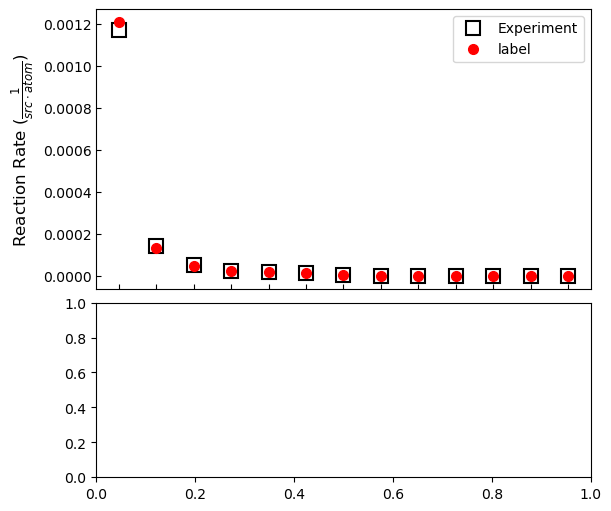

In [5]:
# initialization
foil_list = ['nb93', 'al27', 'ni58', 'au197']
reaction_labels = ['$^{93}$Nb(n,2n)$^{92m}$Nb', '$^{27}$Al(n,\u03B1)$^{24}$Na', '$^{58}$Ni(n,p)$^{58}$Co', '$^{197}$Au(n,\u03B3)$^{198}$Au']
ylabel = r'Reaction Rate $(\frac{1}{src \cdot atom})$'

for i,foil in enumerate(foil_list):

    xaxis_label = experiment_file.get_tally_xaxis(f'rr_onaxis1_{foil}')

    measured = experiment_file.get_tally_dataframe(f'rr_onaxis1_{foil}')
    mcnp_eff3 = mcnp_eff3_file.get_tally_dataframe(f'rr_onaxis1_{foil}')
    mcnp_fendl1 = mcnp_fendl1_file.get_tally_dataframe(f'rr_onaxis1_{foil}')

    try:
        mcnp_fendl2 = mcnp_fendl2_file.get_tally(f'rr_onaxis1_{foil}')
    except:
        mcnp_fendl2 = None

    
    # read openmc results from its statepoint file
    openmc_1 = helpers.get_openmc_tally('reaction_rates_onaxis', 'statepoint.100.h5', f'{foil}_irdff_rr')
    openmc_1 = helpers.postprocess_openmc_foils(openmc_1, 'onaxis_group1')
    # openmc_1 = openmc_onaxis1.get_tally_dataframe(f'{foil}_irdff_rr')
    
    # plot
    dtype_label = reaction_labels[i]
    tickers = np.arange(len(measured))

    fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize=(6, 5), gridspec_kw={'height_ratios': [2, 1.25]}, constrained_layout=True)
    ax1.plot(tickers, measured['mean'], marker='s', ms=10,
                      ls='none', mew=1.5, mec='k', mfc='none', alpha=1, label='Experiment')
    ax1.plot(tickers, mcnp_eff3['mean'], marker='o',
                          ms=7, ls='none', alpha=1, color='red', label='label')
    # ax1.errorbar(openmc_1)

    # ax1.floor_ceiling([measured, mcnp_fendl1, mcnp_fendl2])  # FUNCTION IN HELPERS/VISUALIZE
    ax1.set_yscale('log')
    ax1.set_ylim([floor, ceiling])
    ax1.set_xticks(self.tickers)
    ax1.tick_params(axis='x', labelbottom=False)
    ax1.tick_params(axis='both', which='both', direction='in')
    ax1.set_ylabel(ylabel, fontsize=12)

    #
    # ax2.3_sigma_area()  # FUNCTION IN HELPERS/VISUALIZE
    ax2.errorbar(mcnp_eff3)
    ax2.errorbar(mcnp_fendl1)
    ax2.errorbar(mcnp_fendl2)
